<h1 align='center' style='color:purple'>Iris Dataset Clustering </h1>

#### Loading Necessary Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [2]:
#loading the dataset
iris= load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.data #features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.target #target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Exploration

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
df.shape

(150, 5)

In [21]:
#to display the first and last five rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [23]:
#To display column labels of DataFrame
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [24]:
#To display the statistical analysis for numerical columns within the DataFrame
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### There exist outliers in the petal length column

In [25]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

### Data Preprocessing

In [27]:
df.duplicated().sum()

1

In [30]:
#Dropping Duplicates
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
df['class'].unique()

array([0, 1, 2])

In [33]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

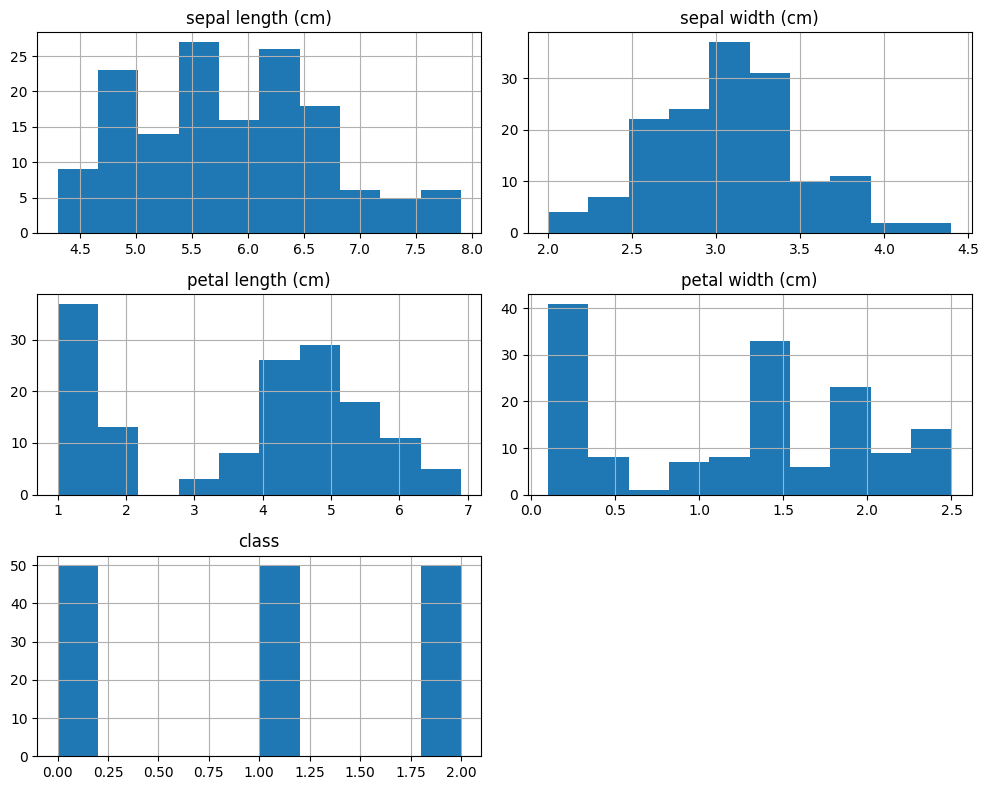

In [34]:
# Plot histograms for each feature
df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

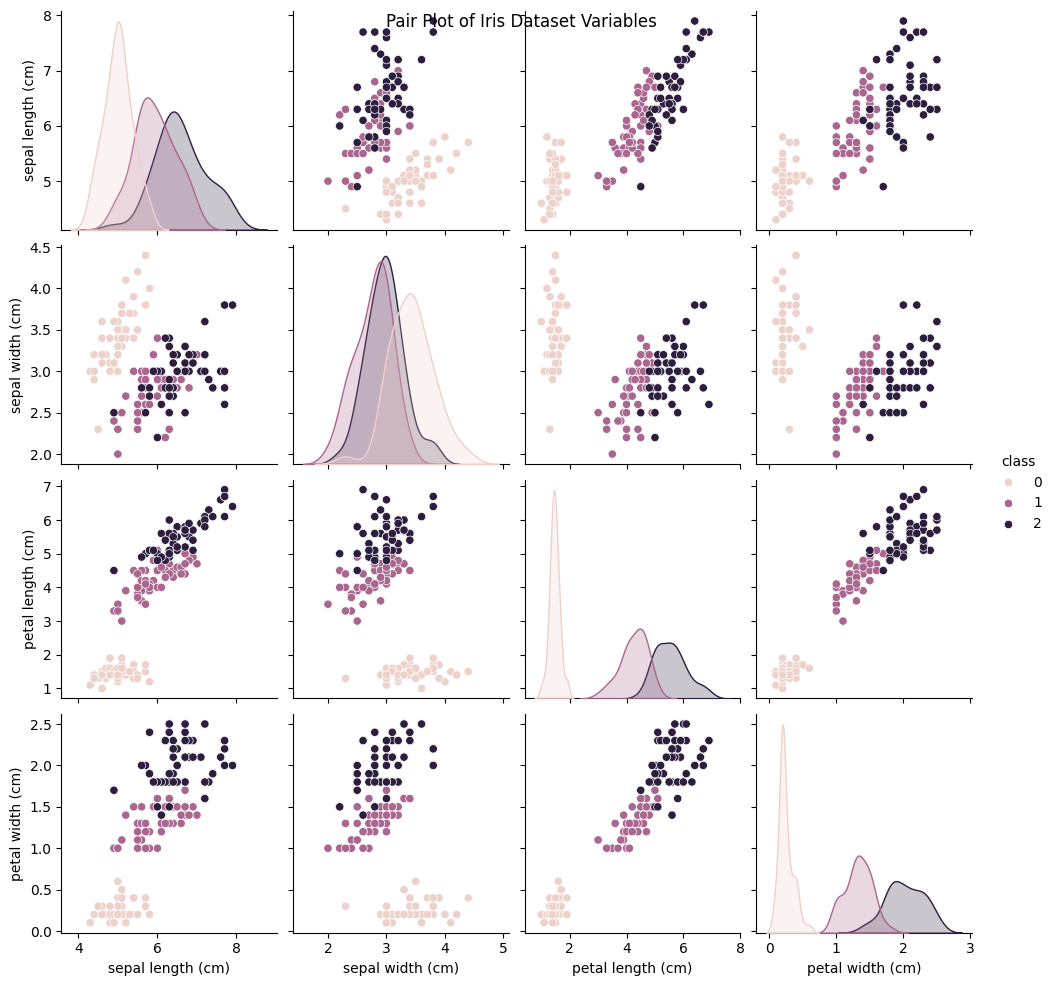

In [36]:
# Create a pair plot
sns.pairplot(df, hue='class')
plt.suptitle('Pair Plot of Iris Dataset Variables')
plt.show()

This provides a visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot shows the relationship between two variables, and the color of the data points indicates the species of the iris flower.

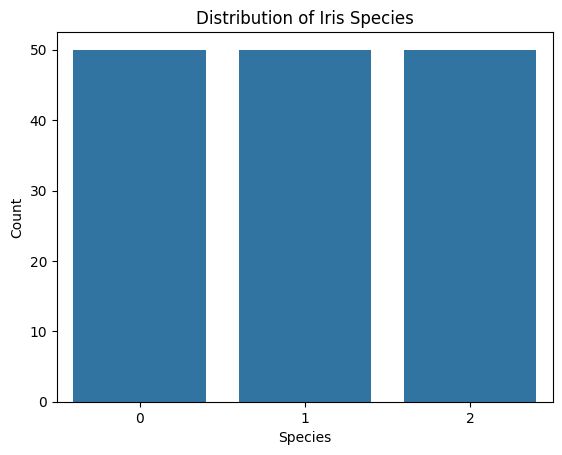

In [37]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [38]:
colname= df.select_dtypes("float64").columns
colname

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

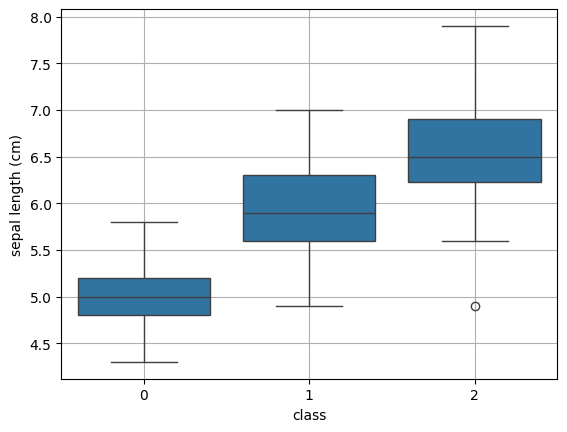

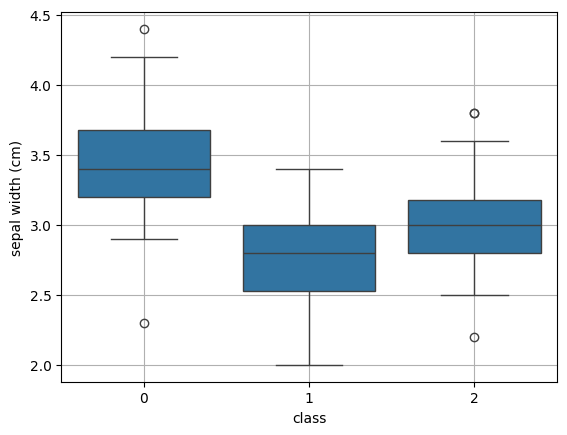

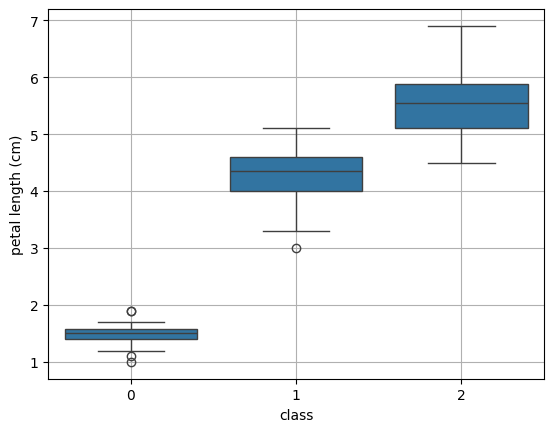

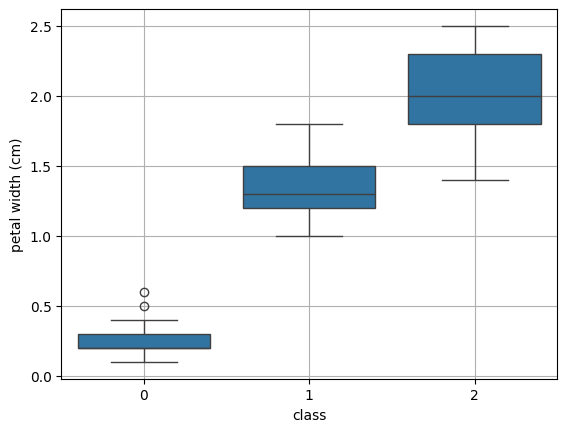

In [39]:
for col in df[colname]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

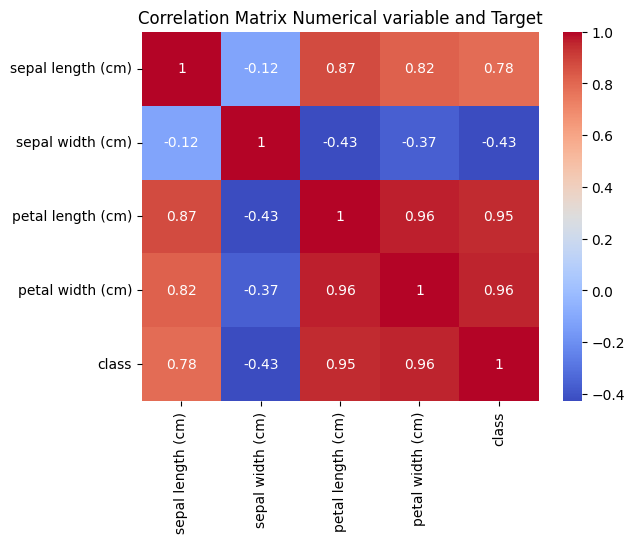

In [41]:
# Calculate correlations
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Numerical variable and Target')
plt.show()

In [42]:
#replacing the missing values with the median of the feature
df = df.fillna(df.median())

#### Outlier Removal

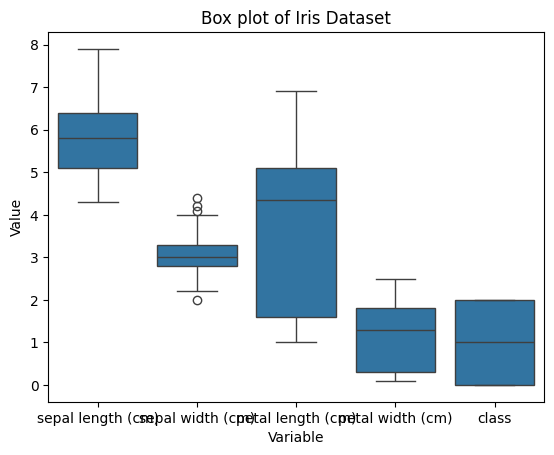

In [43]:
# Create box plots for each variable
sns.boxplot(x="variable", y="value", data=pd.melt(df))

# Set plot title and labels
plt.title("Box plot of Iris Dataset")
plt.xlabel("Variable")
plt.ylabel("Value")

# Display the plot
plt.show()

In [44]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [45]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

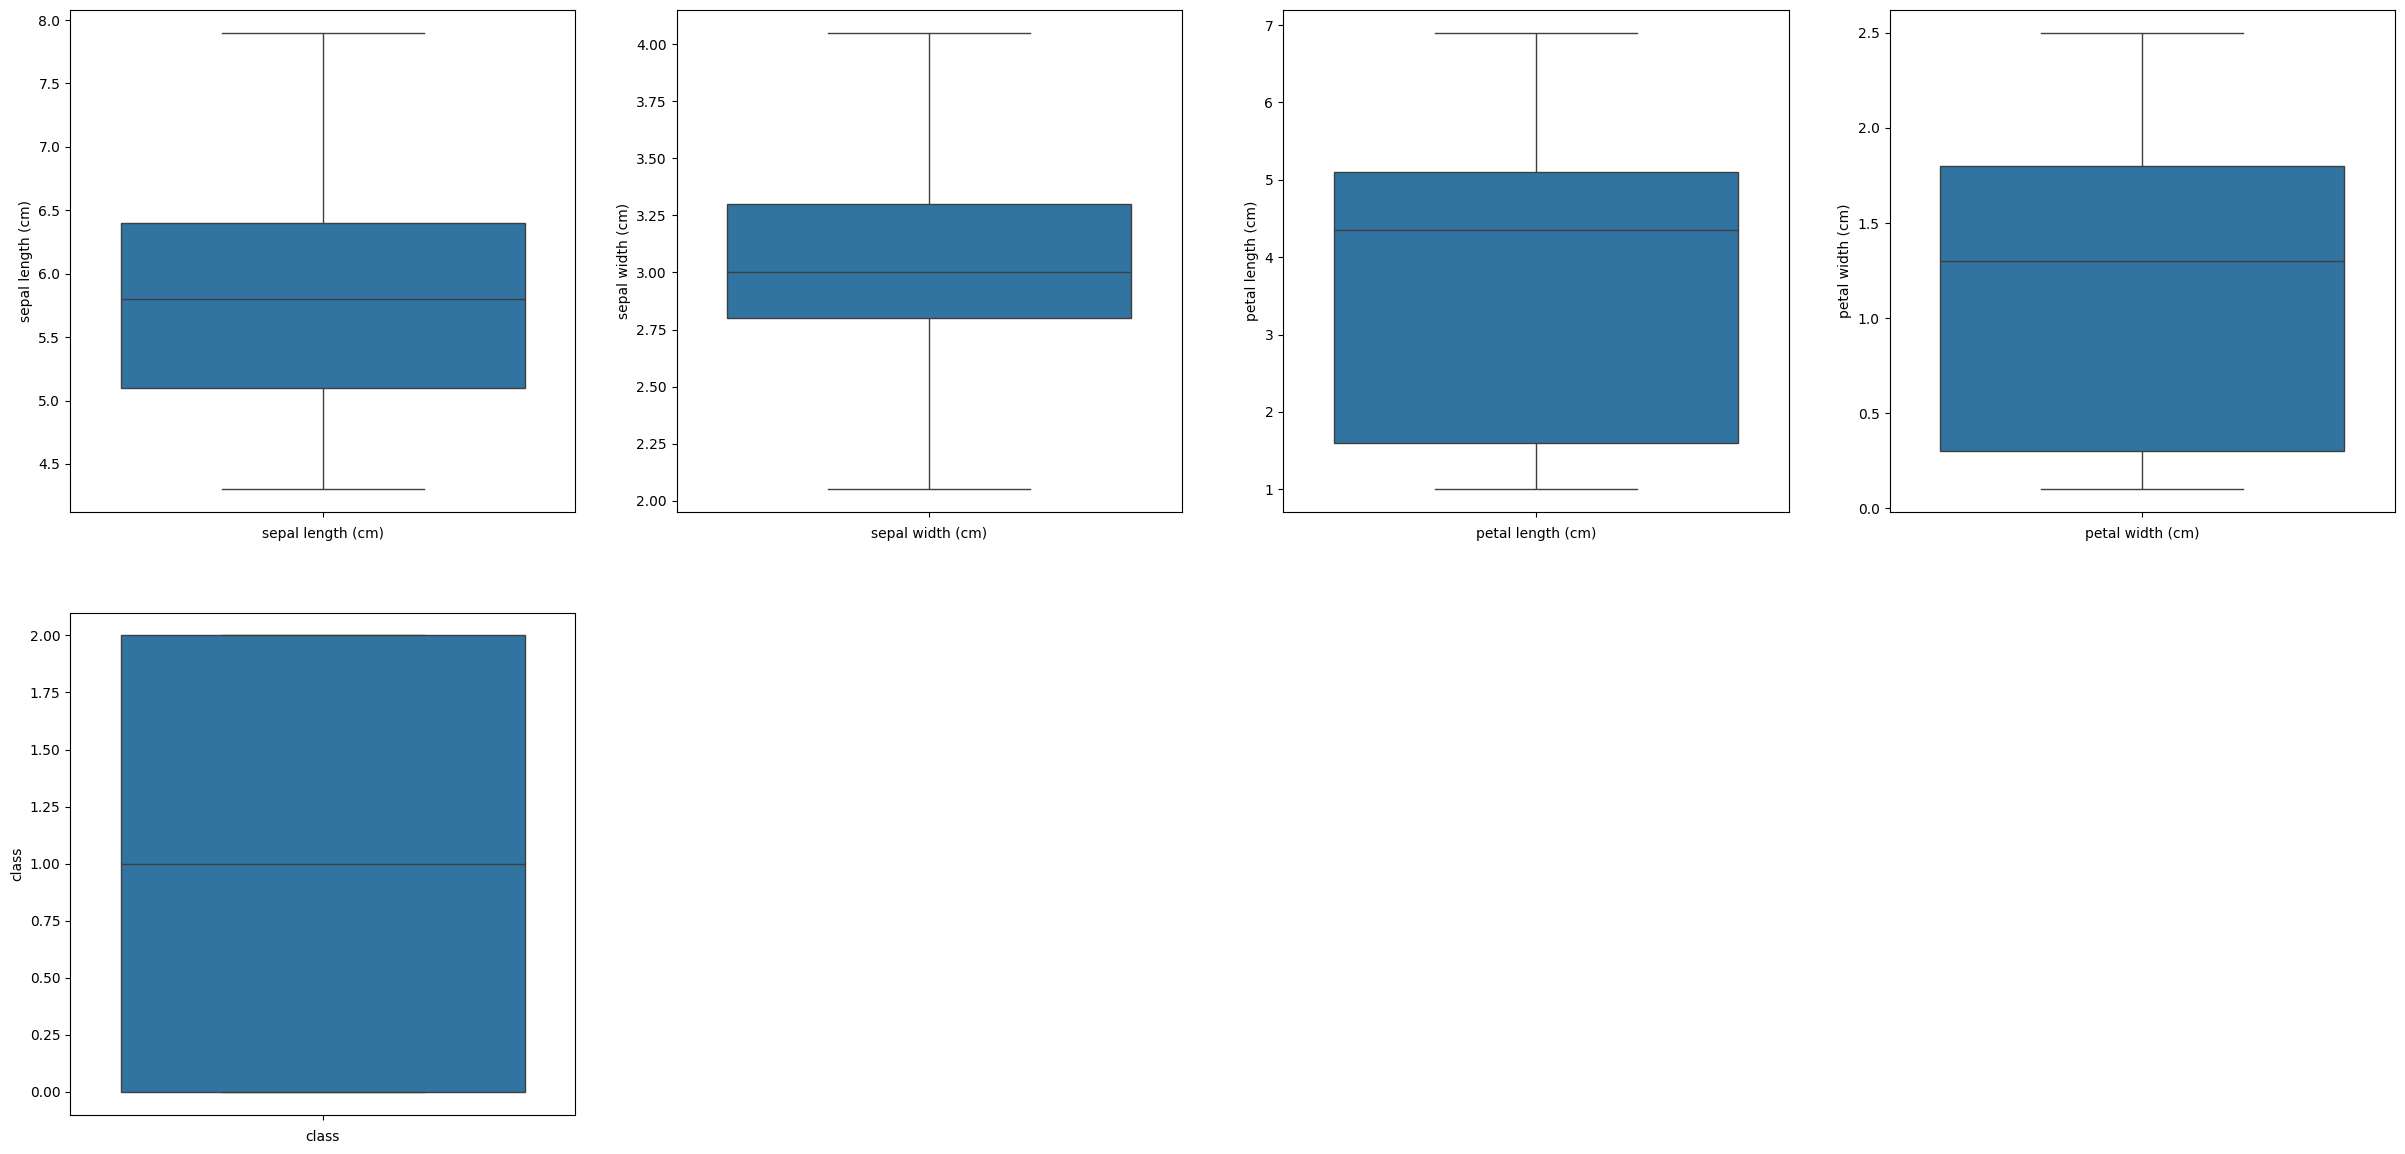

In [46]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

#### Feature Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[colname])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=colname)

df[colname] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667,2.0
146,0.555556,0.225,0.677966,0.750000,2.0
147,0.611111,0.475,0.711864,0.791667,2.0
148,0.527778,0.675,0.745763,0.916667,2.0


#### Model Fitting

In [49]:
cleaned_df=df.drop('class',axis=1)

In [50]:
cleaned_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.475,0.711864,0.916667
146,0.555556,0.225,0.677966,0.750000
147,0.611111,0.475,0.711864,0.791667
148,0.527778,0.675,0.745763,0.916667


### K-means Clustering

<h4 style='color:purple'>Elbow Plot</h4>

If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot.
In this case we can use elbow plot to find K.

In [61]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([42.99236227, 13.27235533,  7.93863481,  6.32374882,  5.71562825,
        4.76355227,  3.94020496,  3.7444612 ,  3.69454975,  3.04674871])

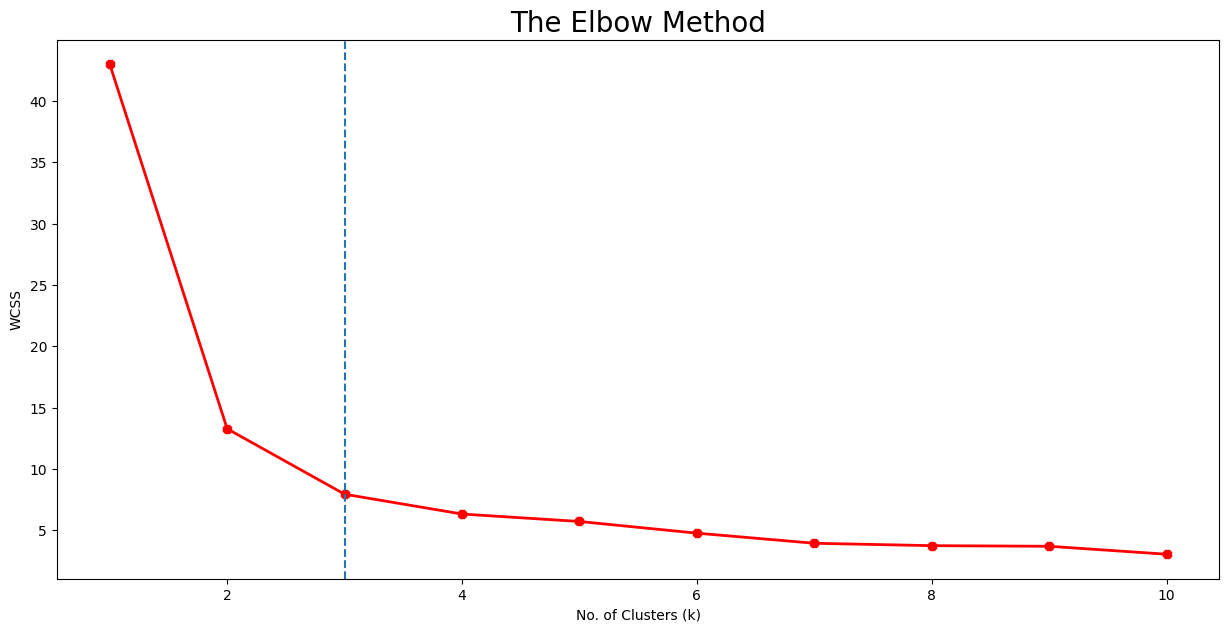

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

It is clear, that the optimal number of clusters for our data are 3, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 3, it would be difficult to visualize the elbow if we choose the higher range.

In [63]:
clustering_data = cleaned_df.iloc[:,[0,1,2,3]]
clustering_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667


In [64]:
km=KMeans(n_clusters=3)
km.fit(clustering_data)

KMeans(n_clusters=3)

Now that we have the clusters created, we will enter them into a different column

In [66]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = km.fit_predict(clustering_data)
clusters.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster_Prediction
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


We can also get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm.

In [67]:
km.cluster_centers_

array([[0.67476852, 0.521875  , 0.76553672, 0.79079861],
       [0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.42521368, 0.30913462, 0.56649283, 0.53285256]])

<h4 style='color:purple'>Silhouette Coefficient</h4>

We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [77]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(clustering_data)
    s.append(silhouette_score(clustering_data, km_pred))

s

[0.621372977569765,
 0.4890124667910461,
 0.43419761698067094,
 0.4328095951016704,
 0.34629528266424264,
 0.3500659581727096,
 0.340143040034505,
 0.3094382727613195,
 0.3317084031859751]

These are the silhouette scores for different values of K

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

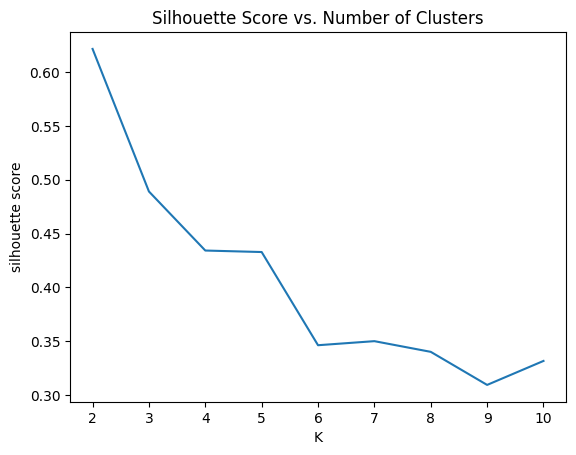

In [78]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

In [80]:
optimalkmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeansbest= optimalkmeans.fit_predict(clustering_data)

In [82]:
silhouette_score(clustering_data, y_kmeansbest)

0.621372977569765

### Heirarchical Clustering

In [83]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(clustering_data)

In [86]:
# Comparing the cluster labels to the true labels (if available)
print("K-means clustering labels:")
print(km_pred)
print("Hierarchical clustering labels:")
print(ward_pred)
print("True labels:")
print(y)

# Evaluating the clustering performance (if true labels are available)
from sklearn.metrics import adjusted_rand_score

# Adjusted Rand Index (ARI) for K-means
kmeans_ari = adjusted_rand_score(y, km_pred)
print("Adjusted Rand Index (ARI) for K-means:", kmeans_ari)

# Adjusted Rand Index (ARI) for hierarchical clustering
hierarchical_ari = adjusted_rand_score(y, ward_pred)
print("Adjusted Rand Index (ARI) for hierarchical clustering:", hierarchical_ari)

K-means clustering labels:
[0 5 5 5 0 7 0 0 5 5 7 0 5 5 7 7 7 0 7 7 0 7 0 0 0 5 0 0 0 5 5 0 7 7 5 5 0
 0 5 0 0 5 5 0 7 5 7 5 7 0 6 6 6 2 6 4 6 2 6 2 2 4 2 4 4 6 4 4 9 2 1 4 9 4
 6 6 6 6 4 2 2 2 4 9 4 6 6 9 4 2 2 4 2 2 4 4 4 4 2 4 3 1 8 1 3 8 2 8 9 3 3
 1 3 9 1 3 1 8 8 9 3 1 8 1 3 8 1 1 1 8 8 8 1 6 9 8 3 1 1 3 3 3 1 3 3 3 9 1
 3 1]
Hierarchical clustering labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 2 0 2 0
 0 2 0 0 2 0 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 0 0 2 2 2 0 2 2 2 0 0
 2 0]
True labels:
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32
Adjusted Rand Index (ARI) for K-means: 0.33333498985381205
Adjusted Rand Index (ARI) for hierarchical clustering: 0.6356968215158925


In [87]:
# Silhouette Score
kmeans_silhouette = silhouette_score(clustering_data, km_pred)
hierarchical_silhouette = silhouette_score(X_scaled, ward_pred)

In [88]:
# Create DataFrame
Data = pd.DataFrame({
    'Metric': ['Adjusted Rand Index (ARI)', 'Silhouette Score'],
    'K-means': [kmeans_ari, kmeans_silhouette],
    'Hierarchical': [hierarchical_ari, hierarchical_silhouette]
})

# Print the DataFrame
print(Data)

                      Metric   K-means  Hierarchical
0  Adjusted Rand Index (ARI)  0.333335      0.635697
1           Silhouette Score  0.331708      0.455874


#### Dendrogram visualization with scipy

In [89]:
linkage_type = 'ward'
linkage_matrix = linkage(clustering_data, linkage_type)

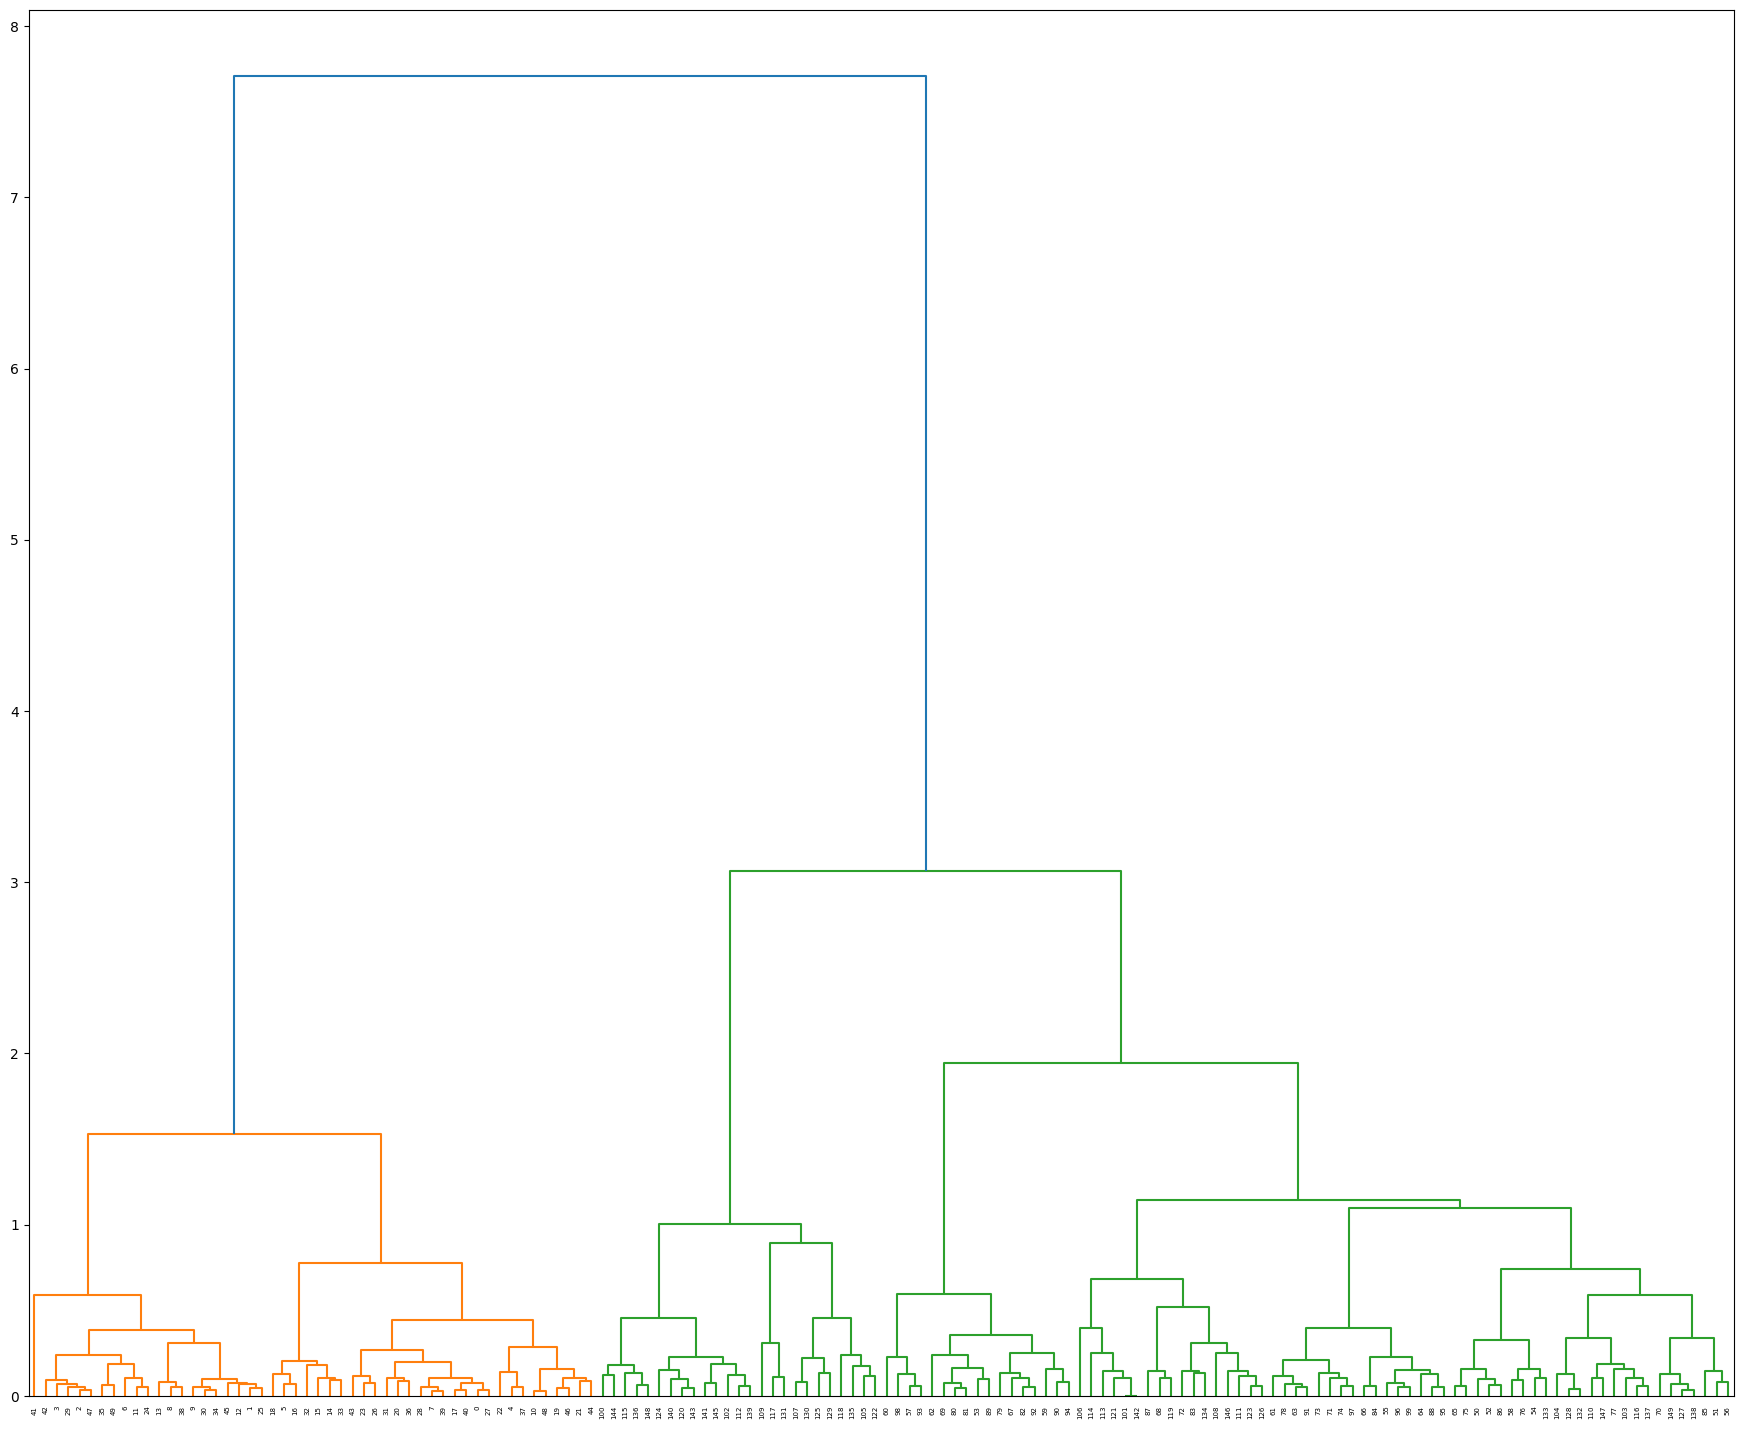

In [90]:
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

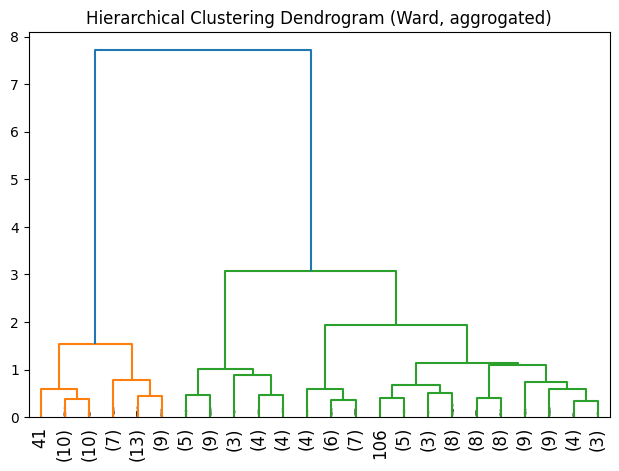

In [91]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.show()

#### Conslusion

1. K Means Clustering: Silhouette Score: 0.6206 K Means clustering achieved a relatively high silhouette score, indicating well-separated and compact clusters. This suggests that K Means clustering is effective in capturing the underlying structure of the Iris dataset.
2. 
Hierarchical Clustering (Agglomerative): Silhouette Score: 0.3027 Hierarchical clustering, specifically Agglomerative Clustering, produced a lower silhouette score compared to K Means. While the score is positive, indicating some level of separation and cohesion within clusters, it is notably lower than that of K Means.

#### In summary, based on the silhouette scores, K Means clustering outperforms hierarchical clustering (Agglomerative Clustering) on the Iris dataset. K Means achieved higher cluster quality in terms of separation and compactness.actness.ations.